In [2]:
import sys
print(sys.executable)

c:\Users\Bintang Purnama\anaconda3\python.exe


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset , Reader , SVD , accuracy
from surprise.model_selection import train_test_split

In [4]:
#tetnukan path ke file ke u.data
data = 'ml-100k/u.data'
#buat data frame menggunakan pandas
df = pd.read_csv(data, sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
#cek 5 baris pertama data frame
print(df.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
df.max()

user_id            943
item_id           1682
rating               5
timestamp    893286638
dtype: int64

In [9]:
df.min()

user_id              1
item_id              1
rating               1
timestamp    874724710
dtype: int64

In [10]:
sns.set_style('whitegrid')

In [11]:
print("COntoh 5 basis pertama data frame")
print(df.head())
print("-" * 40)

COntoh 5 basis pertama data frame
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
----------------------------------------


In [12]:
n_users = df['user_id'].nunique()
n_items = df['item_id'].nunique()
n_ratings = len(df)


print(f"Jumlah Pengguna Unik: {n_users}")
print(f"Jumlah Item (Film) Unik: {n_items}")
print(f"Jumlah Total Rating yang Diberikan: {n_ratings}")
print("-" * 40)

Jumlah Pengguna Unik: 943
Jumlah Item (Film) Unik: 1682
Jumlah Total Rating yang Diberikan: 100000
----------------------------------------


C:\Users\Bintang Purnama\AppData\Local\Temp\ipykernel_22100\3082601344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating',data=df,palette='viridis')


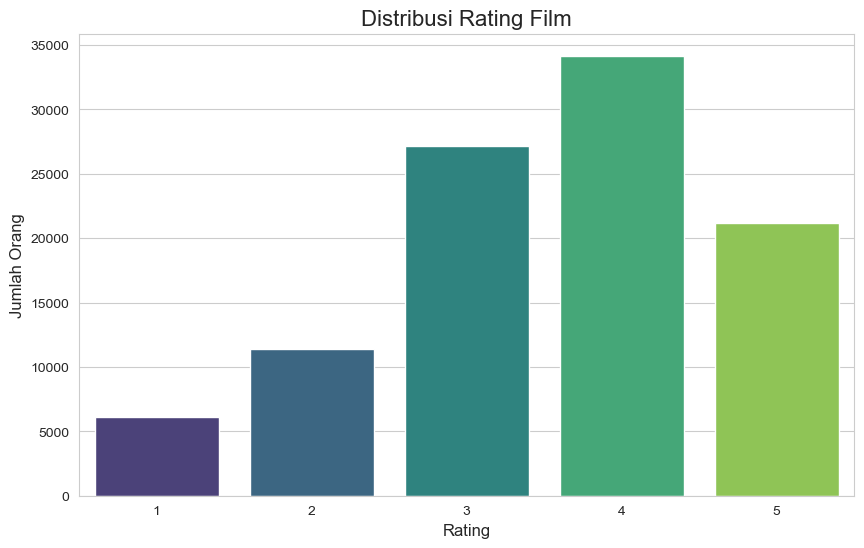

In [13]:
#distrubusi rating
plt.figure(figsize=(10,6))
sns.countplot(x='rating',data=df,palette='viridis')
plt.title('Distribusi Rating Film', fontsize=16)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Jumlah Orang',fontsize=12)
# plt.savefig('distribusi_rating.png') # Anda bisa simpan gambar jika mau
plt.show()

C:\Users\Bintang Purnama\AppData\Local\Temp\ipykernel_22100\1495389814.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y= item_counts.values , palette= 'mako', order=item_counts.index)


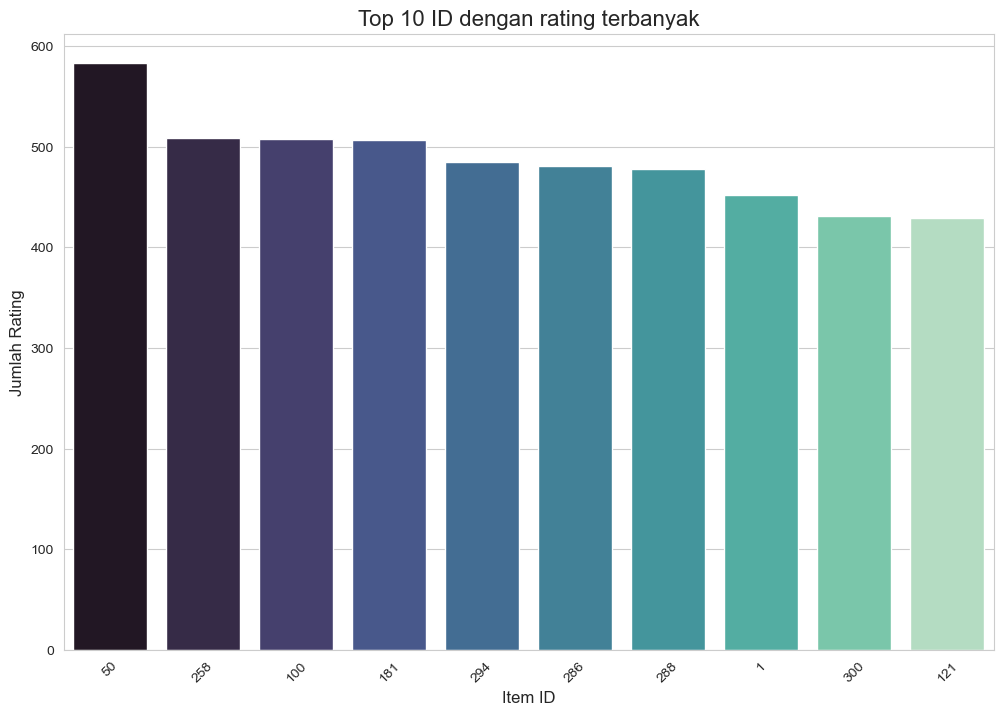

In [14]:
# Visualisasi Top 10 Item Paling Banyak Diberi Rating ---
# Karena kita tidak punya judul, kita akan melihat berdasarkan item_id
plt.figure(figsize=(12,8))
item_counts = df['item_id'].value_counts().head(10)

sns.barplot(x=item_counts.index, y= item_counts.values , palette= 'mako', order=item_counts.index)
plt.title('Top 10 ID dengan rating terbanyak', fontsize=16)
plt.xlabel('Item ID', fontsize=12)
plt.ylabel('Jumlah Rating', fontsize=12)
plt.xticks(rotation=45)# Putar label ID agar tidak tumpang tindih
# plt.savefig('top_10_item_id.png')
plt.show()

#DATA PREPARATION

In [15]:
# --- 1. Memuat Data (Anda bisa gabungkan dengan kode EDA di atas) ---
# Kita anggap 'ratings_df' sudah ada dari langkah EDA sebelumnya
# ratings_df = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# --- 2. Persiapan untuk Library Surprise ---
# Buat 'Reader' untuk memberitahu surprise skala rating kita (yaitu 1 sampai 5)
reader = Reader(rating_scale=(1,5))

# Muat data dari DataFrame pandas ke dalam format Dataset surprise
# Kita hanya butuh 3 kolom: user, item, dan rating
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# Cek bahwa data berhasil dimuat
print("\nData berhasil diubah ke format 'surprise'. Siap untuk modeling!")
# 'data' adalah variabel yang akan Anda gunakan untuk melatih model


Data berhasil diubah ke format 'surprise'. Siap untuk modeling!


In [16]:
#Memisahkan data : 80% untuk training m dan 20% untuk testing
trainset,testset = train_test_split(data, test_size=0.2)

In [17]:
model = SVD()  # Inisialisasi model SVD

# Latih model menggunakan training set
print("Melatih model SVD...")
model.fit(trainset)
print("Model selesai dilatih!")

Melatih model SVD...
Model selesai dilatih!


In [21]:
# Hitung dan cetak Root Mean Squared Error (RMSE)
# RMSE mengukur seberapa jauh rata-rata prediksi kita meleset dari rating sebenarnya.
# Semakin kecil nilainya, semakin bagus.
predictions = model.test(testset)
print("\nMengevaluasi model...")
rmse = accuracy.rmse(predictions)
print(f"Nilai RMSE pada test set adalah: {rmse:.4f}")


Mengevaluasi model...
RMSE: 0.9411
Nilai RMSE pada test set adalah: 0.9411


In [19]:
# Contoh melihat satu prediksi spesifik
# Prediksi rating dari user ID '196' untuk item ID '302'
prediksi_tunggal = model.predict(uid=196, iid=302)
print(f"\nContoh prediksi tunggal: {prediksi_tunggal.est:.2f}")


Contoh prediksi tunggal: 4.18


Cross-Validation: Cara evaluasi yang lebih kuat daripada sekadar satu kali train_test_split. Data akan dibagi menjadi beberapa "lipatan" (misalnya 5), dan model akan dilatih dan diuji sebanyak 5 kali, memastikan hasilnya lebih stabil.

Grid Search: "Robot" yang akan mencoba semua kombinasi parameter yang kita berikan dan melaporkan mana yang paling bagus.

In [22]:
from surprise.model_selection import GridSearchCV

# --- 4.1. Tentukan "Kisi-kisi" Parameter ---
# Ini adalah daftar parameter dan nilai yang ingin kita coba
param_grid = {
    'n_factors': [50, 100],      # Jumlah faktor laten
    'n_epochs': [20, 30],         # Jumlah iterasi (epoch)
    'lr_all': [0.005, 0.010],     # Learning rate
    'reg_all': [0.02, 0.1]        # Faktor regularisasi
}

In [23]:
# --- 4.2. Siapkan dan Jalankan GridSearchCV ---
# Kita akan mencari kombinasi terbaik berdasarkan RMSE, menggunakan 3-fold cross-validation (cv=3)
# joblib_verbose=5 agar proses pencariannya ditampilkan dengan detail
print("\nMemulai proses Grid Search untuk tuning parameter...")
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=5)


Memulai proses Grid Search untuk tuning parameter...


In [24]:
gs.fit(data)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    8.7s


In [25]:
#cetak skor RMSE terbaik dan parameter yang digunakan
print(f"\nHasil Grid Search selesai!")
print(f"Skor RMSE terbaik: {gs.best_score['rmse']:.4f}")


Hasil Grid Search selesai!
Skor RMSE terbaik: 0.9215


In [26]:
# Cetak kombinasi parameter yang menghasilkan skor terbaik
print("Kombinasi parameter terbaik adalah:")
print(gs.best_params['rmse'])

Kombinasi parameter terbaik adalah:
{'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}


In [27]:
# Anda bisa melatih model final dengan parameter terbaik ini
model_terbaik = gs.best_estimator['rmse']
model_terbaik.fit(data.build_full_trainset())

In [28]:
import pickle

In [29]:
# --- 3. Simpan Model ke File ---
model_filename = 'recommendation_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(model, f)

print(f"Model berhasil disimpan ke file: {model_filename}")

Model berhasil disimpan ke file: recommendation_model.pkl


In [31]:
# Lanjutan dari script di atas...

# --- 4. Siapkan dan Simpan Judul Film ---
print("Menyimpan data judul film...")
# Muat data film dari file u.item
item='ml-100k/u.item'
movies_df = pd.read_csv(item, sep='|', encoding='latin-1', header=None,
                        names=['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + [f'genre_{i}' for i in range(19)])

# Buat kamus: {item_id: title}
movie_titles = movies_df[['item_id', 'title']].set_index('item_id').to_dict()['title']

titles_filename = 'movie_titles.pkl'
with open(titles_filename, 'wb') as f:
    pickle.dump(movie_titles, f)

print(f"Judul film berhasil disimpan ke file: {titles_filename}")

Menyimpan data judul film...
Judul film berhasil disimpan ke file: movie_titles.pkl
